### **Tutorial 17: Stationary Test**

In time-seriese anlaysis, it is important to understand if a sequence is stationary or non-stationary. 

### **Sequence is tationary**
- A time series is stationary if its statistical properties, such as the mean, variance, and autocovariance, do not change over time. In other words, the series does not have trends or seasonal patterns, and its fluctuations are consistent across the time period.

### **Types of Stationarity**
- **Strict Stationarity**: A series is strictly stationary if the joint distribution of any set of values does not depend on time. This is a very strong condition and often not applicable in practical time series.
- **Weak Stationarity**: A series is weakly stationary (or second-order stationary) if the following three conditions are met:
    - The mean of the series is constant over time.
    - The variance of the series is constant over time.
    - The autocovariance (the covariance between values at different times) depends only on the time difference (lag) and not on the actual time at which the data was observed.


### **Non-Stationary Sequence**
- A time series is non-stationary if its statistical properties (mean, variance, autocovariance) change over time. Non-stationary series usually have:
    - Trends (upward or downward movements over time),
    - Seasonal effects (patterns that repeat at regular intervals), or
    - Changing variance (variance that changes over time)

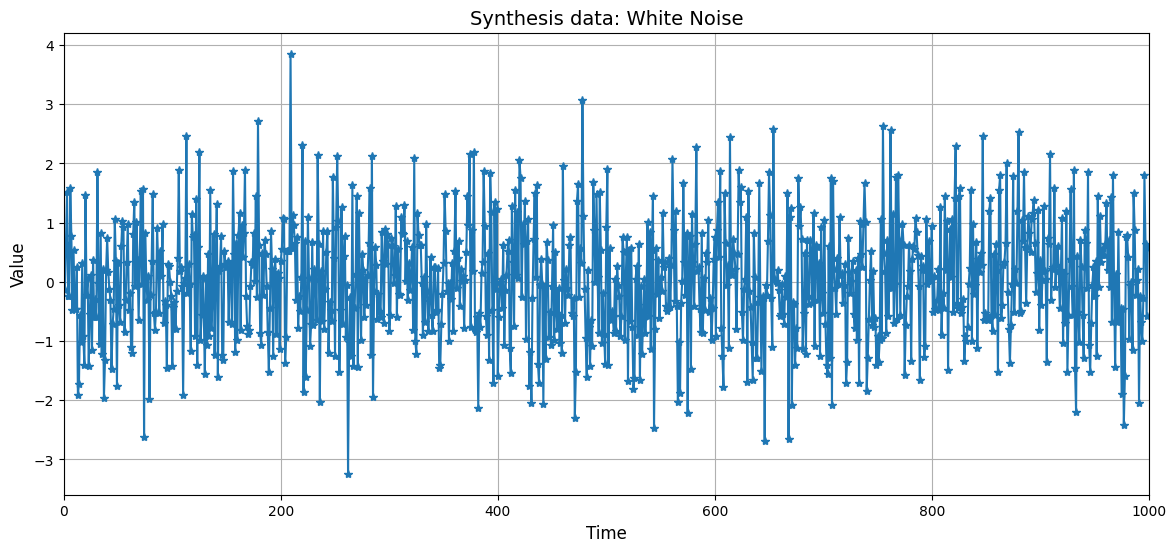

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_points = 1000  
mean = 0         
std_dev = 1      


white_noise = np.random.normal(loc=mean, scale=std_dev, size=n_points)


plt.figure(figsize=(14, 6))
plt.plot(white_noise, '*-')
plt.title('Synthesis data: White Noise', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.xlim([0, n_points])
plt.ylabel('Value', fontsize=12)
plt.grid(True)
plt.show()


### How to Check for Stationarity

To check if a time series is stationary, we can use several methods:

- **Visual Inspection:** Plot the time series and observe if there are any obvious trends, seasonality, or changes in variance. Stationary series typically show no visible trend and have a constant mean and variance.
- **Summary Statistics**: Check if the mean and variance of the series change over time. This can be done by dividing the series into different segments and comparing their means and variances.

- **Stationarity Tests**: Use formal statistical tests to check for stationarity:

    - Augmented Dickey-Fuller (ADF) Test: This test is used to check if a series has a unit root (i.e., if it is non-stationary). The null hypothesis of the ADF test is that the series is non-stationary, so a small p-value (usually less than 0.05) indicates stationarity.
    - Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test: This test checks for trend stationarity. The null hypothesis of the KPSS test is that the series is stationary around a deterministic trend. A high p-value suggests that the series is stationary, while a low p-value suggests non-stationarity.
    - Phillips-Perron (PP) Test: Another test similar to the ADF test, but it adjusts for serial correlation and heteroskedasticity.


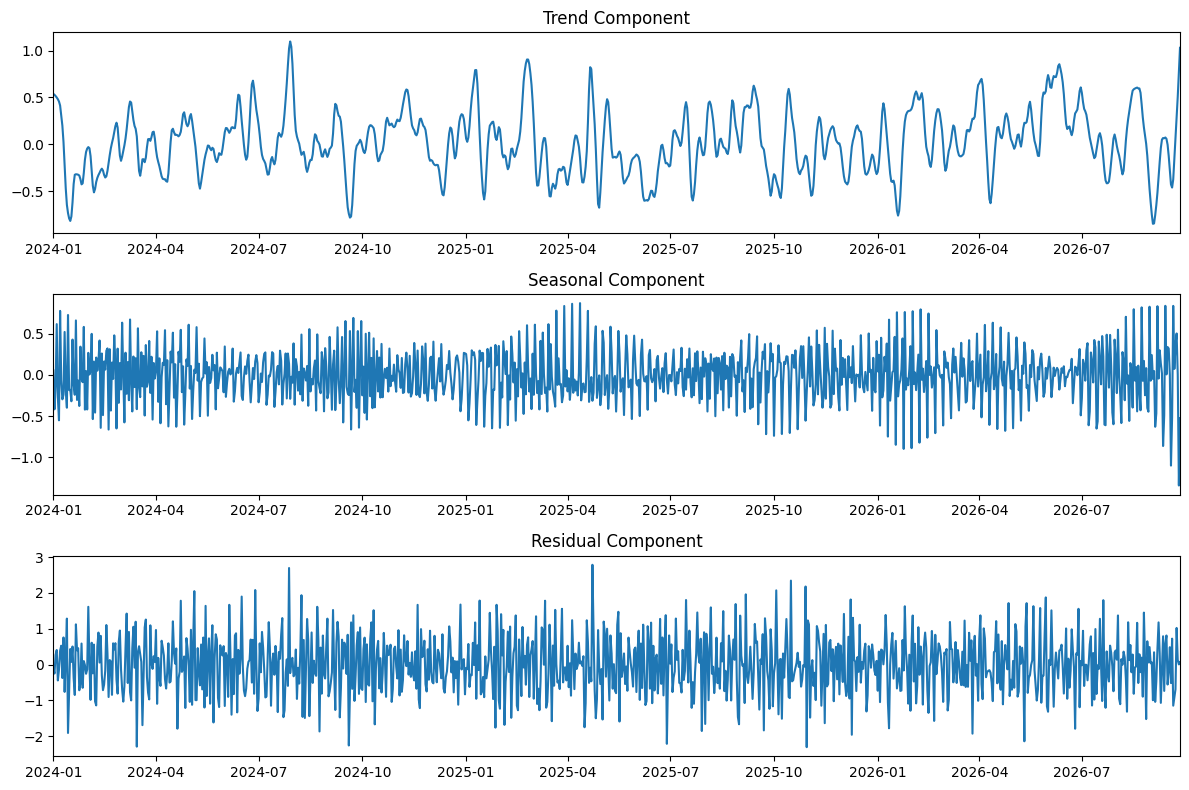

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import pandas as pd

time_index = pd.date_range(start='2024-01-01', periods=n_points, freq='D')
time_series = pd.Series(white_noise, index=time_index)


stl = STL(time_series, seasonal=13)
result = stl.fit()

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(result.trend)
plt.title('Trend Component')
plt.xlim([time_series.index[0], time_series.index[-1]])


plt.subplot(3, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal Component')
plt.xlim([time_series.index[0], time_series.index[-1]])

plt.subplot(3, 1, 3)
plt.plot(result.resid)
plt.title('Residual Component')
plt.xlim([time_series.index[0], time_series.index[-1]])

plt.tight_layout()
plt.show()

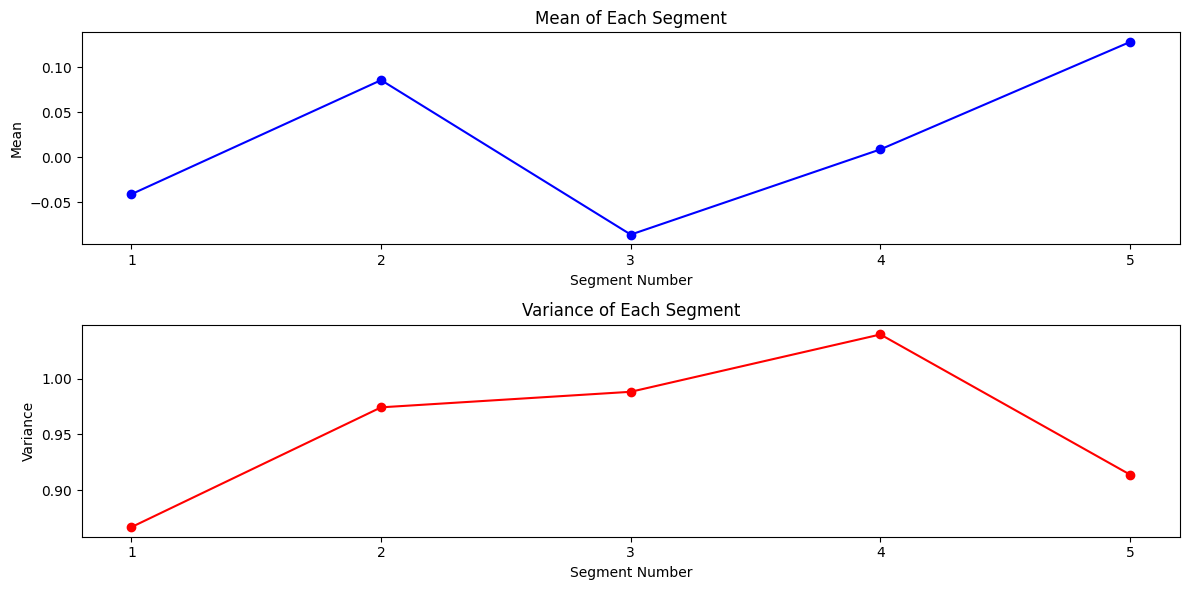

In [17]:
def check_stationarity_by_segments(series, segment_length):
    num_segments = len(series) // segment_length
    means = []
    variances = []

    for i in range(num_segments):
        segment = series[i * segment_length: (i + 1) * segment_length]
        means.append(segment.mean())
        variances.append(segment.var())

    return means, variances

segment_length = 200
means, variances = check_stationarity_by_segments(time_series, segment_length)


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(means, marker='o', linestyle='-', color='b')
plt.title('Mean of Each Segment')
plt.xlabel('Segment Number')
plt.ylabel('Mean')
plt.xticks(ticks=np.arange(len(means)), labels=np.arange(1, len(means) + 1))

plt.subplot(2, 1, 2)
plt.plot(variances, marker='o', linestyle='-', color='r')
plt.title('Variance of Each Segment')
plt.xlabel('Segment Number')
plt.ylabel('Variance')
plt.xticks(ticks=np.arange(len(variances)), labels=np.arange(1, len(variances) + 1))
plt.tight_layout()

### **Interpretation**:

- If the mean and variance remain roughly constant across the segments, this suggests the series is stationary.
- If the mean or variance shows significant changes between segments, the series is likely non-stationary.

For a stationary time series, you should expect:
- A constant mean: The average value of the series does not change over time.
- A constant variance: The variability of the series stays the same over time.
---

### Augmented Dickey-Fuller (ADF) Test

The **Augmented Dickey-Fuller (ADF) test** is a statistical test used to determine whether a time series is **stationary** or has a **unit root** (i.e., is non-stationary). It is an extension of the Dickey-Fuller test, which accounts for higher-order autocorrelations in the time series.

#### **Key Concepts**

1. **Stationarity**: A time series is stationary if its statistical properties, such as mean, variance, and autocorrelation, remain constant over time. Non-stationary series typically exhibit trends, seasonal patterns, or varying variance.

2. **Unit Root**: A time series has a unit root if it is non-stationary. It means that the series has a stochastic trend and exhibits random walks. In this case, the time series has long-term dependence, meaning its value is not mean-reverting over time.

The ADF test helps determine whether or not the time series has a **unit root** and thus is **non-stationary**.

#### **Hypotheses of ADF Test**

- **Null Hypothesis (H₀)**: The series has a unit root, meaning it is non-stationary.
- **Alternative Hypothesis (H₁)**: The series does not have a unit root, meaning it is stationary.

#### **ADF Test Model**

The ADF test is based on the following equation:

$$
\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \sum_{i=1}^{p} \delta_i \Delta y_{t-i} + \epsilon_t
$$

Where:
- $ \Delta $ is the first difference operator (i.e., $ \Delta y_t = y_t - y_{t-1} $),
- $ y_t $ is the time series at time $ t $,
- $ t $ is a time trend (optional),
- $ \alpha $ is a constant (intercept),
- $ \beta $ is the coefficient of the trend (optional),
- $ \gamma $ is the coefficient of the lagged value $ y_{t-1} $,
- $ \delta_i $ are the coefficients for lagged differences,
- $ p $ is the number of lags included,
- $ \epsilon_t $ is the error term.

The ADF test assesses whether the coefficient $ \gamma $ is significantly different from zero. If $ \gamma = 0 $, the series has a unit root and is non-stationary.

---

#### **Steps in the ADF Test**

1. **Formulate the hypotheses**:
   - **Null Hypothesis (H₀)**: The series has a unit root (non-stationary).
   - **Alternative Hypothesis (H₁)**: The series is stationary (no unit root).

2. **Select the number of lags $ p $**:
   - The number of lags is chosen to capture autocorrelation in the data, but not to overfit the model.

3. **Run the regression**:
   - Estimate the ADF regression model and calculate the test statistic (t-statistic for $ \gamma $).

4. **Compare the test statistic**:
   - Compare the test statistic to critical values from the Dickey-Fuller distribution to make a decision.
   - If the test statistic is **more negative** than the critical value, we reject the null hypothesis, suggesting that the series is stationary.

---

#### **Python Implementation: ADF Test**

We can use the `adfuller()` function from the `statsmodels` library to perform the ADF test.

---
#### Interpretation of Results
    - ADF Statistic: The test statistic (t-statistic for 𝛾) of the ADF regression model. If this value is more negative than the critical values, we reject the null hypothesis.

    - p-value: If the p-value is less than a significance level (e.g., 0.05), we reject the null hypothesis of a unit root.

    - Critical Values: The critical values at different significance levels (e.g., 1%, 5%, 10%) are provided to help compare the ADF statistic.

#### **Interpretation of Example**
- If the ADF Statistic is more negative than the critical values at the 1%, 5%, or 10% significance level, and the p-value is small (typically < 0.05), we reject the null hypothesis and conclude that the series is stationary.
- Otherwise, if the statistic is less negative or the p-value is large, we fail to reject the null hypothesis, implying that the series is non-stationary and has a unit root.


In [21]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(time_series)

# Output the results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"  {key}: {value}")



ADF Statistic: -31.811093841491456
p-value: 0.0
Critical Values:
  1%: -3.4369127451400474
  5%: -2.864437475834273
  10%: -2.568312754566378
